# WDFY4 transcriptomics cis comparison

## Step 1: Library Imports

Run this cell to import the necessary libraries

In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import scipy.stats
import sys 
sys.path.append('C:\\Users\\brittany henderson\\GitHub\\WhenMutationsMatter\\Brittany\\')
import functions as f

import cptac
import cptac.algorithms as al

## Step 2: Find the frequently mutated genes for Endometrial Cancer

Enter the type of cancer and the cutoff for mutation frequency that you would like to use.

In [2]:
en_object = cptac.Endometrial()
desired_cutoff = .1

endometrial_freq_mut = al.get_frequently_mutated(en_object, cutoff = desired_cutoff)
print('\n\nNumber of Frequently Mutated Genes:', len(endometrial_freq_mut), '\n', endometrial_freq_mut.head())

                                    

Number of Frequently Mutated Genes: 232 
         Unique_Samples_Mut  Missence_Mut  Truncation_Mut
Gene                                                    
ABCA12            0.147368      0.094737        0.073684
ABCA13            0.115789      0.105263        0.042105
ACVR2A            0.105263      0.010526        0.094737
ADGRG4            0.136842      0.126316        0.021053
ADGRV1            0.115789      0.094737        0.052632


## Step 3: Select WDFY4, a frequently mutated gene

In [3]:
gene = 'WDFY4'

## Step 4: Select transcriptomics

Select which type of omics you want to compare. If you want to compare proteomics data for the interacting proteins, uncomment the "omics = en.get_proteomics()" line, etc.

In [4]:
omics = en_object.get_transcriptomics()

## Step 5: cis comparison 

Determine if the DNA mutation has an effect on the omics measurement. In order to do this, we have a few steps in code. The first three steps are found in the format_cis_comparison_data function.
1. get a table with both the omics and mutation data for tumors
2. get a binary column from the mutation data to separate our samples
3. format data frame to be used in the T-test
4. send data to the T-test.
5. visualize data 

In [5]:
# Steps 1-3
en_status = f.format_cis_comparison_data(en_object, omics, 'transcriptomics', gene)
en_status.head()

,WDFY4_transcriptomics,binary_mutations
Sample_ID,,
S001,8.04,Wildtype
S002,8.79,Wildtype
S003,9.22,Wildtype
S005,8.06,Wildtype
S006,9.59,Wildtype


In [6]:
omics_col_list = ['WDFY4_transcriptomics']
transcriptomics_col = gene+'_transcriptomics'

# Step 4 - T-test comparing means of mutated vs. wildtype effect on cis omics
print("Doing t-test comparison for mutation status\n")
significant_pval_results = al.wrap_ttest(en_status, 'binary_mutations', omics_col_list)
print(significant_pval_results)

Doing t-test comparison for mutation status

No significant comparisons.
None


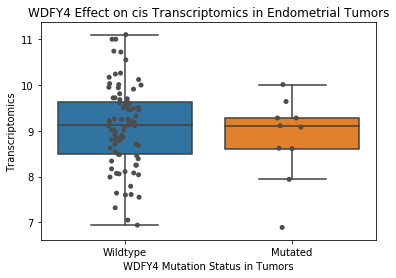

In [7]:
# Step 5 - Create box plot to compare wildtype and mutated effect on omics data
en_cis_boxplot = sns.boxplot(data = en_status, x = 'binary_mutations',
                          y = transcriptomics_col, order = ["Wildtype","Mutated"], showfliers = False)  
en_cis_boxplot.set_title(gene + " Effect on cis Transcriptomics in Endometrial Tumors")
en_cis_boxplot = sns.stripplot(data= en_status, x = 'binary_mutations',
                            y = transcriptomics_col,jitter = True, color = ".3", order = ["Wildtype","Mutated"])
en_cis_boxplot.set(xlabel = gene + " Mutation Status in Tumors", ylabel = "Transcriptomics")
plt.show()

Repeat above steps with mutation type comparison (missense vs. truncation)

In [8]:
# Prepare data frame for T-test
en_type = f.get_missence_truncation_comparison(en_object, omics, 'transcriptomics', gene)
#print(en_type.head())

# T-test comparing means of missense vs. truncation effect on cis omics
print("Doing t-test comparison for mutation type\n")
significant_pval_results = al.wrap_ttest(en_type, 'binary_mutations', omics_col_list)
print(significant_pval_results)

Doing t-test comparison for mutation type

No significant comparisons.
None


C:\Users\brittany henderson\Anaconda3\envs\Research\lib\site-packages\numpy\core\fromnumeric.py:3367: RuntimeWarning: Degrees of freedom <= 0 for slice
  **kwargs)
C:\Users\brittany henderson\Anaconda3\envs\Research\lib\site-packages\numpy\core\_methods.py:132: RuntimeWarning: invalid value encountered in double_scalars
  ret = ret.dtype.type(ret / rcount)
C:\Users\brittany henderson\Anaconda3\envs\Research\lib\site-packages\scipy\stats\_distn_infrastructure.py:877: RuntimeWarning: invalid value encountered in greater
  return (self.a < x) & (x < self.b)
C:\Users\brittany henderson\Anaconda3\envs\Research\lib\site-packages\scipy\stats\_distn_infrastructure.py:877: RuntimeWarning: invalid value encountered in less
  return (self.a < x) & (x < self.b)
C:\Users\brittany henderson\Anaconda3\envs\Research\lib\site-packages\scipy\stats\_distn_infrastructure.py:1831: RuntimeWarning: invalid value encountered in less_equal
  cond2 = cond0 & (x <= self.a)


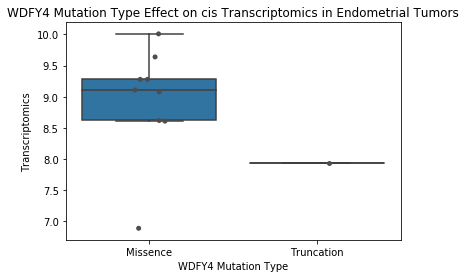

In [9]:
# Step 5 - Create boxplt to compare missense and truncation type effect on omics data
en_cis_boxplot = sns.boxplot(data = en_type, x = 'binary_mutations',
                          y = transcriptomics_col, order = ["Missence","Truncation"], showfliers = False)  
en_cis_boxplot.set_title(gene + " Mutation Type Effect on cis Transcriptomics in Endometrial Tumors")
en_cis_boxplot = sns.stripplot(data= en_type, x = 'binary_mutations',
                            y = transcriptomics_col,jitter = True, color = ".3", order = ["Missence","Truncation"])
en_cis_boxplot.set(xlabel = gene + " Mutation Type", ylabel = 'Transcriptomics')
plt.show()

# Repeat with the Colon dataset

Go through the same process, this time using the Colon dataset. We will only print five genes from the frequently mutated data frame for simplicity.

In [10]:
colon_object = cptac.Colon()
desired_cutoff = .1

colon_freq_mut = al.get_frequently_mutated(colon_object, cutoff = desired_cutoff)
print('\n\nNumber of Frequently Mutated Genes:', len(colon_freq_mut), '\n', colon_freq_mut.head())

                                    

Number of Frequently Mutated Genes: 612 
         Unique_Samples_Mut  Missence_Mut  Truncation_Mut
Gene                                                    
ABCA13            0.195876      0.164948        0.103093
ABCA2             0.175258      0.164948        0.030928
ABCA4             0.144330      0.082474        0.061856
ABCB4             0.134021      0.061856        0.072165
ABCB6             0.103093      0.061856        0.041237


In [11]:
gene = 'WDFY4'

co_omics = colon_object.get_transcriptomics()

In [12]:
omics_and_mutations = colon_object.join_omics_to_mutations(
        mutations_genes = gene, omics_df_name = 'transcriptomics', omics_genes = gene).dropna()

WDFY4 did not match any columns in transcriptomics dataframe. WDFY4_transcriptomics column inserted, but filled with NaN.


# Repeat with the Ovarian dataset


In [13]:
ovarian_object = cptac.Ovarian()
desired_cutoff = .1

ovarian_freq_mut = al.get_frequently_mutated(ovarian_object, cutoff = desired_cutoff)

In [14]:
gene = 'WDFY4'

ov_omics = ovarian_object.get_transcriptomics()

In [15]:
ov_status = f.format_cis_comparison_data(ovarian_object, ov_omics, 'transcriptomics', gene)

print("Doing t-test comparison for mutation status\n")
significant_pval_results = al.wrap_ttest(ov_status, 'binary_mutations', omics_col_list)
print(significant_pval_results)

Doing t-test comparison for mutation status

No significant comparisons.
None


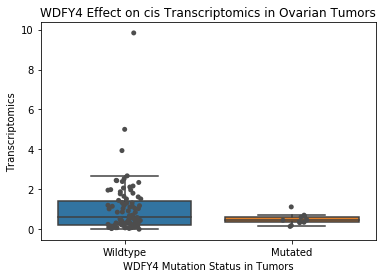

In [16]:
# Step 5 - Visualize comparison
ov_cis_boxplot = sns.boxplot(data = ov_status, x = 'binary_mutations',
                             y = transcriptomics_col, order = ["Wildtype","Mutated"], showfliers = False)  
ov_cis_boxplot.set_title(gene + " Effect on cis Transcriptomics in Ovarian Tumors")
ov_cis_boxplot = sns.stripplot(
    data = ov_status, x = 'binary_mutations',y = transcriptomics_col, jitter = True, color = ".3", 
    order = ["Wildtype","Mutated"])
ov_cis_boxplot.set(xlabel = gene + " Mutation Status in Tumors", ylabel = "Transcriptomics")
plt.show()

Doing t-test comparison for mutation type

No significant comparisons.
None


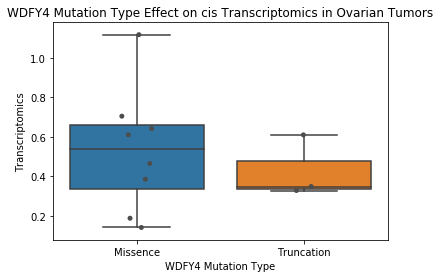

In [17]:
ov_type = f.get_missence_truncation_comparison(ovarian_object, ov_omics, 'transcriptomics', gene)

print("Doing t-test comparison for mutation type\n")
significant_pval_results = al.wrap_ttest(ov_type, 'binary_mutations', omics_col_list)
print(significant_pval_results)

# Step 5 - Create boxplt to compare mutation type effect on omics data
en_cis_boxplot = sns.boxplot(data = ov_type, x = 'binary_mutations',
                          y = transcriptomics_col, order = ["Missence","Truncation"], showfliers = False)  
en_cis_boxplot.set_title(gene + " Mutation Type Effect on cis Transcriptomics in Ovarian Tumors")
en_cis_boxplot = sns.stripplot(data= ov_type, x = 'binary_mutations',
                            y = transcriptomics_col,jitter = True, color = ".3", order = ["Missence","Truncation"])
en_cis_boxplot.set(xlabel = gene + " Mutation Type", ylabel = 'Transcriptomics')
plt.show()

# Visualize Pancancer effects

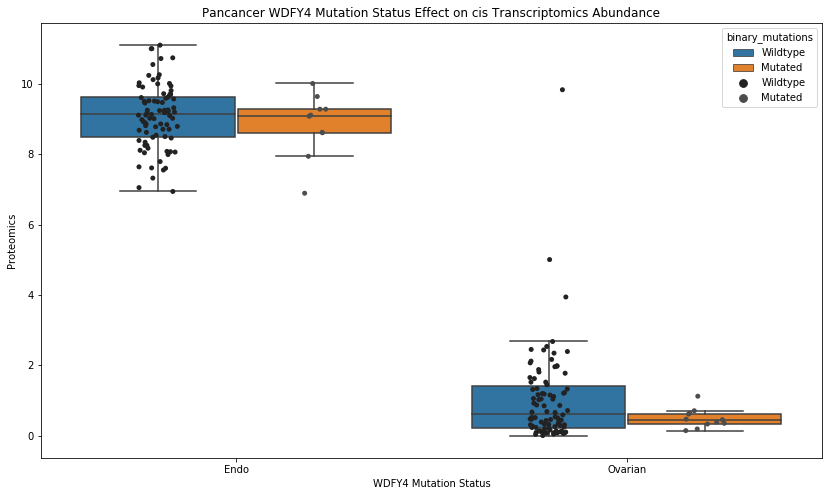

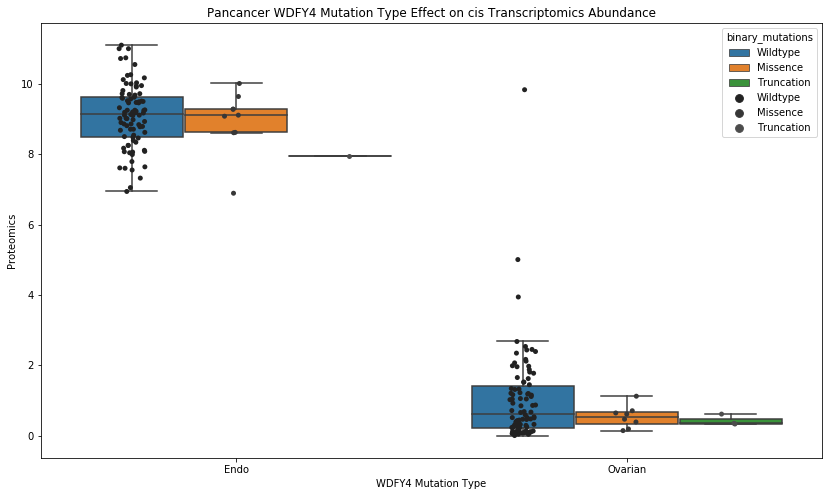

In [18]:
# Create a dataframe with pancancer data and labeling for mutation status and type
en_mut_status = en_status.assign(Cancer= 'Endo')
ov_mut_status = ov_status.assign(Cancer= 'Ovarian')
en_mut_type = en_type.assign(Cancer= 'Endo')
ov_mut_type = ov_type.assign(Cancer= 'Ovarian')

pancancer_data = pd.concat([en_mut_status, ov_mut_status, en_mut_type, ov_mut_type]) 
pancancer_df = pd.melt(pancancer_data, id_vars=['Cancer','binary_mutations'], value_name= 'Proteomics')  

# Visualize mutation status (mutated vs. wildtype) accross cancers
plt.rcParams['figure.figsize']=(14,8) #size of plot
cis_status = sns.boxplot(
    x='Cancer', y="Proteomics", hue = 'binary_mutations', hue_order = ['Wildtype', 'Mutated'], data=pancancer_df, showfliers = False)    
cis_status.set_title('Pancancer ' + gene + " Mutation Status Effect on cis Transcriptomics Abundance")
cis_status = sns.stripplot(x='Cancer', y="Proteomics", hue = 'binary_mutations', data=pancancer_df,
                            jitter = True, color = ".3", hue_order = ['Wildtype', 'Mutated'], dodge = True)
cis_status.set(xlabel = gene + " Mutation Status", ylabel = 'Proteomics')

plt.show()

plt.clf()
plt.close()

# Visualize mutation type (missence vs. truncation) accross cancers
cis_status = sns.boxplot(
    x='Cancer', y="Proteomics", hue = 'binary_mutations', hue_order = ['Wildtype', 'Missence', 'Truncation'], 
    data = pancancer_df, showfliers = False)    
cis_status.set_title('Pancancer ' + gene + " Mutation Type Effect on cis Transcriptomics Abundance")
cis_status = sns.stripplot(
    x='Cancer', y="Proteomics", hue = 'binary_mutations', data = pancancer_df, jitter = True, color = ".3", 
    hue_order = ['Wildtype', 'Missence', 'Truncation'], dodge = True)
cis_status.set(xlabel = gene + " Mutation Type", ylabel = 'Proteomics')
plt.rcParams['figure.figsize']=(14,8) #size of plot
plt.show()

plt.clf()
plt.close()

# Analysis of Results

No significant comparisons. No transcriptomics data for colon dataset.